## Exercise "Natural Language Processing" -- Text Mining

---



For this course, save a COPY to your Google Drive for the tutorial (File -> Save copy in Drive). Then complete the tasks in your saved copy. If you're done, submit the notebook via moodle by sharing a link with the appropriate permissions (preferred, but please do not make changes after the deadline) or by submitting the downloaded `.ipynb` file.

This is an individual assignment, i.e., submit your solutions individually.
This assignment is **ungraded/optional**.

Due date: 04.05.2023, 9:15 a.m.(CEST)


## Text mining on "1984" by George Orwell
For this assignment, you will be working with the text of the book "1984" by George Orwell. Get the data you need from [this link](https://gutenberg.net.au/ebooks01/0100021.txt). 

Alternatively, use the following code for getting the data. The resulting text file will be downloaded to the current working directory (`./0100021.txt`).




In [6]:
!curl "https://gutenberg.net.au/ebooks01/0100021.txt" -o "0100021.txt"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
 13  574k   13 80002    0     0  31613      0  0:00:18  0:00:02  0:00:16 31633
 82  574k   82  476k    0     0   138k      0  0:00:04  0:00:03  0:00:01  138k
100  574k  100  574k    0     0   166k      0  0:00:03  0:00:03 --:--:--  166k


**TASK 1:** Write a function that mines the text and outputs the name of the *title*, *author (with the pseudonym)*, *date of the author's death*, *language* and *last sentence* of the book. 

Make sure that the outputs are clean and do no include any extra unrequired characters. The last sentence is supposed to be the last sentence of the book *content* not the last sentence of the provided text file.

In [16]:
import re

def _title(book) -> str:
    title_pattern = r"Title:\s*(.+?)\n"
    title_match = re.search(title_pattern, book)
    title = title_match.group(1).strip()
    return title

def _author(book) -> str:
    author_pattern = r"Author:\s*([^\(]+)"
    author_match = re.search(author_pattern, book)
    author = author_match.group(1).strip()
    return author

def _author_death_date(book) -> int:
    death_pattern = r"\((\d{4})\-\d{4}\)"
    death_match = re.search(death_pattern, book)
    death_date = int(death_match.group(1).strip())
    return death_date

def _language(book) -> str:
    language_pattern = r"Language:\s*(.+?)\n"
    language_match = re.search(language_pattern, book)
    language = language_match.group(1).strip()
    return language

def _last_sentence(book) -> str:
    return last_sentence

def get_information(book):
    title = _title(book)
    author = _author(book)
    author_death_date = _author_death_date(book)
    language = _language(book)
    last_sentence = _last_sentence(book)

    return title, author, author_death_date, language, last_sentence

def read_book(path) -> str:
    with open(path, "r") as f:
        book = f.read()
    return book

In [17]:
file_path = "0100021.txt"
book = read_book(file_path)
title, author, author_death_date, language, last_sentence = get_information(book)

print(f"Title: {title}")
print(f"Author: {author}")
print(f"Author's death date: {author_death_date}")
print(f"Language: {language}")
print(f"Last sentence: {last_sentence}")


Title: Nineteen eighty-four
Author: George Orwell
Author's death date: 1903
Language: English
Last sentence: 


**TASK 2:** This book has **23** chapters. How can we extract the text for each chapter in the book? Implement this and load the result into any appropriate data structure (e.g. a list `["<text chapter 1>", "<text chapter 2>", ...]` or a dict `{"chapter1": "...", "chapter2": "..."}`). *Note*: There are multiple parts in the book where the chapter counter re-starts from 1. You can deal with this however you like, but make sure to properly separate these chapters. Dealing with real-world text data is always messy!



In [23]:
def separate_chapters(book):
    # Define chapter start pattern
    chapter_pattern = r'^Chapter \d+'

    # Split the book into chapters
    chapters = re.split(chapter_pattern, book, flags=re.MULTILINE)[1:]

    # Combine the chapter titles and text into a dictionary
    chapter_dict = {}
    for i, chapter_text in enumerate(chapters):
        # Extract the chapter title
        title = re.findall(chapter_pattern, book, flags=re.MULTILINE)[i].strip()

        # Remove the chapter title from the chapter text
        text = chapter_text.strip()

        # Add the chapter to the dictionary
        chapter_dict[f"Chapter{i+1} "] = text

    return chapter_dict


chapter_dict = separate_chapters(book)
for chapter, text in chapter_dict.items():
    print(f"{chapter}: {text[:100]}...")

Chapter1 : It was a bright cold day in April, and the clocks were striking thirteen.
Winston Smith, his chin nu...
Chapter2 : As he put his hand to the door-knob Winston saw that he had left the
diary open on the table. DOWN W...
Chapter3 : Winston was dreaming of his mother.

He must, he thought, have been ten or eleven years old when his...
Chapter4 : With the deep, unconscious sigh which not even the nearness of the
telescreen could prevent him from...
Chapter5 : In the low-ceilinged canteen, deep underground, the lunch queue jerked
slowly forward. The room was ...
Chapter6 : Winston was writing in his diary:


   It was three years ago. It was on a dark evening, in a narrow...
Chapter7 : 'If there is hope,' wrote Winston, 'it lies in the proles.'

If there was hope, it MUST lie in the p...
Chapter8 : From somewhere at the bottom of a passage the smell of roasting
coffee--real coffee, not Victory Cof...
Chapter9 : It was the middle of the morning, and Winston had left the cubicle to

**TASK 3:** Tokenize the text in each chapter with the simple "whitespace-split" tokenizer and again with a more advanced tokenizer (either your own or from a package, e.g., NLTK or SpaCy).

1. Complete the tokenizer.

2. How many tokens exist in the *vocabulary* created using all the chapters? Are the numbers different when using whitespace-split versus your advanced approach?

3. Which chapters are the *top-5 longest chapters*, i.e., chapters that have the most number of tokens?

4. Which tokens are the *top-5 most frequent* tokens for the longest chapter in both cases?



In [31]:
!pip install spacy
!python -m spacy download en_core_web_sm

     --------------------------------------- 12.2/12.2 MB 10.9 MB/s eta 0:00:00
     ---------------------------------------- 94.7/94.7 kB ? eta 0:00:00
     -------------------------------------- 48.9/48.9 kB 613.0 kB/s eta 0:00:00
     ------------------------------------- 181.6/181.6 kB 10.7 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 8.5 MB/s eta 0:00:00
     ------------------------------------- 480.9/480.9 kB 10.0 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 9.0 MB/s eta 0:00:00
     ---------------------------------------- 7.0/7.0 MB 8.8 MB/s eta 0:00:00
     --------------------------------------- 12.8/12.8 MB 16.4 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [36]:
import re
import spacy

class Tokenizer:
    def __init__(self):
        self.nlp = spacy.load('en_core_web_sm')

    def tokenize_with_whitespace(self, text):
        return text.split()

    def tokenize_advanced(self, text):
        return [token.text for token in self.nlp(text)]

In [38]:
# Run the following test case to make sure your imlpementation in correct
myTokenizer = Tokenizer()

test1 = 'This is the first tutorial of NLP'
test2 = 'This is the first        tutorial of NLP'
expected_result = ['This', 'is', 'the', 'first', 'tutorial', 'of', 'NLP']

assert myTokenizer.tokenize_with_whitespace(test1) == expected_result
assert myTokenizer.tokenize_with_whitespace(test2) == expected_result
assert myTokenizer.tokenize_advanced(test1) == expected_result
assert myTokenizer.tokenize_advanced(test1) == expected_result


test3 = 'This is the first tutorial of NLP!'
expected_result = ['This', 'is', 'the', 'first', 'tutorial', 'of', 'NLP!']
advanced_expected_result = ['This', 'is', 'the', 'first', 'tutorial', 'of', 'NLP', '!']

assert myTokenizer.tokenize_with_whitespace(test3) == expected_result
assert myTokenizer.tokenize_advanced(test3) == advanced_expected_result

In [68]:
from collections import Counter

def vocabulary(chapters, tokenizer, with_advanced_tokenizer=False):
    tokens = []
    for chapter in chapters:
        if with_advanced_tokenizer:
            tokens += tokenizer.tokenize_advanced(chapter.lower())
        else:
            tokens += tokenizer.tokenize_with_whitespace(chapter.lower())
    return set(tokens)


def longest_chapters(chapters, tokenizer, n=5):
    chapter_lengths = [(idx, len(tokenizer.tokenize_with_whitespace(chapter)))
                       for idx, chapter in enumerate(chapters)]
    sorted_chapters = sorted(chapter_lengths, key=lambda x: x[1], reverse=True)
    return [sorted_chapters[i][0] for i in range(n)]


def frequent_tokens(chapters, tokenizer, n=5, with_advanced_tokenizer=False):

    if with_advanced_tokenizer:
        longest_chapter = max(chapters, key=lambda x: len(tokenizer.tokenize_advanced(x)))
        tokens = tokenizer.tokenize_advanced(longest_chapter.lower())
    else:
        longest_chapter = max(chapters, key=lambda x: len(tokenizer.tokenize_with_whitespace(x)))
        tokens = tokenizer.tokenize_with_whitespace(longest_chapter.lower())

    token_counts = Counter(tokens)
    return [t[0] for t in token_counts.most_common(n)]


# print number of tokens in vocabulary
print(f"Number of tokens in vocabulary: {len(vocabulary(chapter_dict.values(), Tokenizer()))}")
print(f"Number of tokens in vocabulary with advanced tokenizer: {len(vocabulary(chapter_dict.values(), Tokenizer(), with_advanced_tokenizer=True))}")


# print top-5 longest chapters
print(f"Top-5 longest chapters: {longest_chapters(chapter_dict.values(), Tokenizer())}")



# print top-5 most frequent tokens in the longest chapter
print(f"Top-5 most frequent tokens in the longest chapter: {frequent_tokens(chapter_dict.values(), Tokenizer())}")

# print top-5 most frequent tokens in the longest chapter with advanced tokenizer
print(f"Top-5 most frequent tokens in the longest chapter with advanced tokenizer: {frequent_tokens(chapter_dict.values(), Tokenizer(), with_advanced_tokenizer=True)}")


Number of tokens in vocabulary: 14754
Number of tokens in vocabulary with advanced tokenizer: 8951
Top-5 longest chapters: [16, 22, 7, 18, 0]
Top-5 most frequent tokens in the longest chapter: ['the', 'of', 'and', 'to', 'in']
Top-5 most frequent tokens in the longest chapter with advanced tokenizer: ['the', '\n', ',', '.', 'of']


**From this point, only use the top-5 longest chapters.**

**TASK 4**: In this task, you are required to calculate the chapter similarities.

1. Use the advanced tokenizer to construct Bag-of-Words models for each of the 5
chapters. You can choose the data structure (e.g. `dict`).

2. Calculate the cosine similarities for each chapter pair. Use a heatmap visualisation to show the pair-wise cosine similarities of chapters.

Expected output: A 5x5 heatmap and the cosine values. You can use the `seaborn` libray for visualisation. Optional: You can annotate each cell in the heatmap with the corresponding cosine values.

In [75]:
import re
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

# Create a list of tokenized chapters
tokenized_chapters = [Tokenizer().tokenize_advanced(chapter.lower()) for chapter in chapter_dict.values()]

# Build the Bag-of-Words models for each chapter
vectorizer = CountVectorizer()
bow_chapters = vectorizer.fit_transform([' '.join(chapter) for chapter in tokenized_chapters])

# Calculate the cosine similarities for each chapter pair
cosine_similarities = cosine_similarity(bow_chapters)


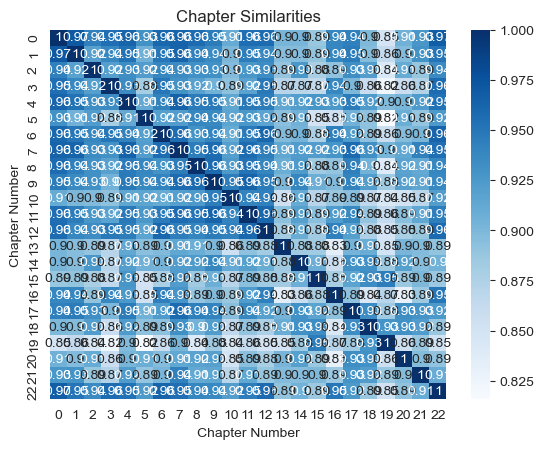

          0         1         2         3         4         5         6   \
0   1.000000  0.970702  0.943287  0.954837  0.962476  0.930560  0.961115   
1   0.970702  1.000000  0.917965  0.938658  0.952810  0.905126  0.949733   
2   0.943287  0.917965  1.000000  0.920120  0.933656  0.922629  0.939366   
3   0.954837  0.938658  0.920120  1.000000  0.934727  0.880778  0.949520   
4   0.962476  0.952810  0.933656  0.934727  1.000000  0.912039  0.941785   
5   0.930560  0.905126  0.922629  0.880778  0.912039  1.000000  0.920301   
6   0.961115  0.949733  0.939366  0.949520  0.941785  0.920301  1.000000   
7   0.963395  0.963261  0.934525  0.930804  0.964094  0.922570  0.956181   
8   0.956958  0.944431  0.931159  0.918243  0.947164  0.939154  0.930073   
9   0.946631  0.935491  0.930961  0.904869  0.947838  0.936909  0.940566   
10  0.910544  0.900187  0.897374  0.892301  0.914784  0.915525  0.910492   
11  0.955462  0.945353  0.926652  0.917807  0.948722  0.926142  0.947185   
12  0.956839

In [76]:
# Create a heatmap visualization of the cosine similarities
sns.heatmap(cosine_similarities, annot=True, cmap='Blues')
plt.title('Chapter Similarities')
plt.xlabel('Chapter Number')
plt.ylabel('Chapter Number')
plt.show()

# Print the cosine similarity values
print(pd.DataFrame(cosine_similarities))

**TASK 5**: Construct a WordCloud for each of the 5 chapters and visualize it.
Use the `wordcloud` package.

If chapters are too long, use your tokenizer and prune the text by keeping only the freuquent tokens. E.g., remove the tokens that occur < 10 times.

In [52]:
!pip install wordcloud

     -------------------------------------- 152.1/152.1 kB 3.0 MB/s eta 0:00:00


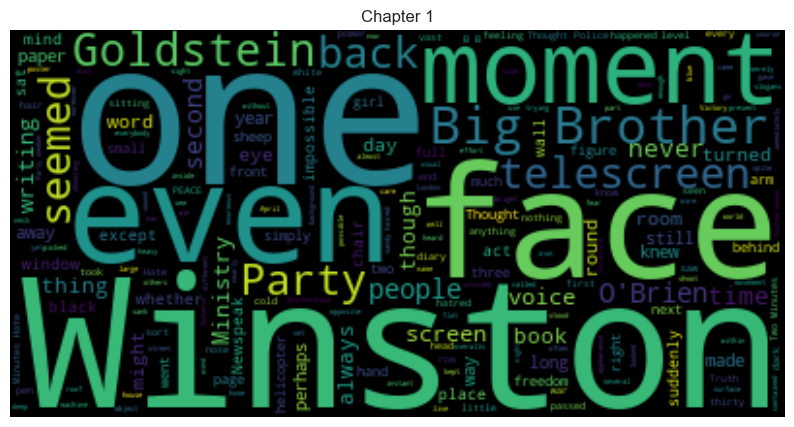

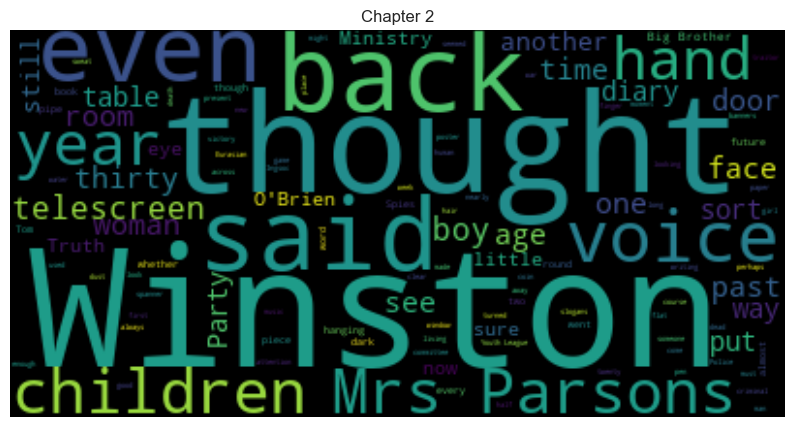

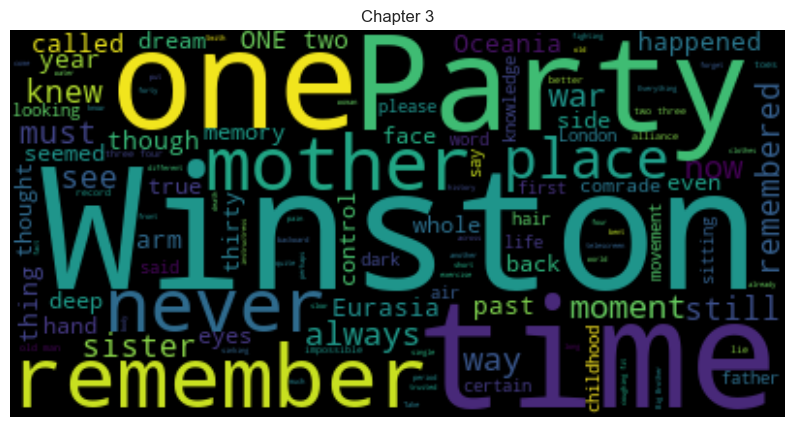

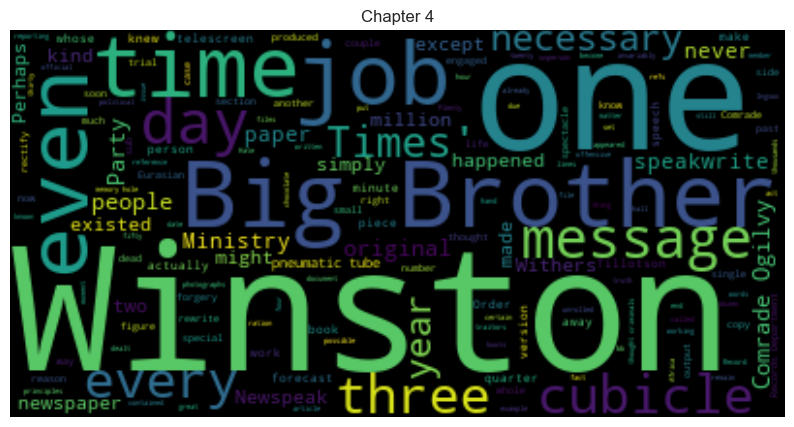

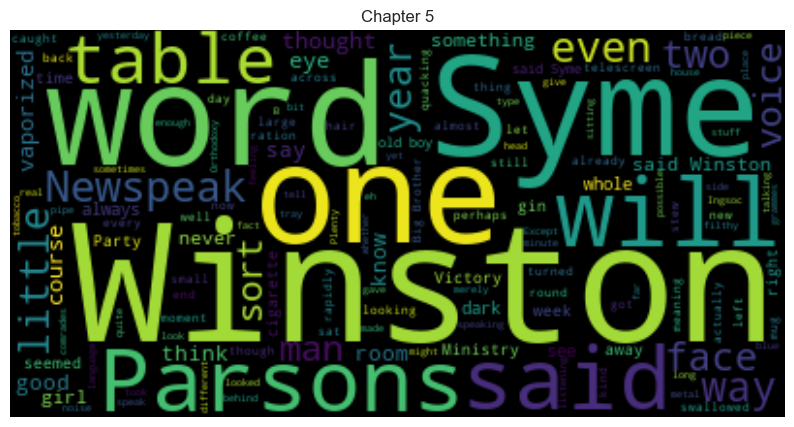

KeyboardInterrupt: 

In [72]:
from wordcloud import WordCloud

# Create a WordCloud for top 5 longest chapters

for idx, chapter in enumerate(chapter_dict.values()):
    wordcloud = WordCloud().generate(chapter)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Chapter {idx+1}')
    plt.show()


